# Taxi Fare Prediction

##### Abstract

In the last few years, the number of for-hire vehicles operating in NY has grown from 
63,000 to more than 100,000. However, while the number of trips in app-based vehicles 
has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million 
to 8.5 million. Hence, the NY Yellow Cab organization decided to become more datacentric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After 
all, that set price is not a random guess.

#### Problem Statement

Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the 
objective is to predict the fare of the taxi ride using Random Forest.

#### Scope

● Prepare and analyse data 
● Perform feature engineering wherever applicable
● Check the distribution of key numerical variables
● Training a Random Forest model with data and check it’s performance
● Perform hyperparameter tuning


#### Dataset Information:

## Column                                    Description
###### unique_id  =  A unique identifier or key for each record in the dataset
###### date_time_of_pickup   =  The time when the ride started
###### longitude_of_pickup  =  Longitude of the taxi ride pickup point
###### latitude_of_pickup   =  Latitude of the taxi ride pickup point
###### longitude__of_dropoff =Longitude of the taxi ride dropoff point
###### latitude_of_dropoff =Latitude of the taxi ride dropoff point
###### no_of_passenger =count of the passengers during the ride
###### amount =(target variable)dollar amount of the cost of the taxi ride


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing dataset

df1=pd.read_csv('ML RF Taxi fare.csv')
df1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df1.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
df1.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df1.shape

(50000, 8)

In [7]:
df=df1[df1['amount']>=0]

In [8]:
df.shape

(49994, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49994 non-null  object 
 1   amount                49994 non-null  float64
 2   date_time_of_pickup   49994 non-null  object 
 3   longitude_of_pickup   49994 non-null  float64
 4   latitude_of_pickup    49994 non-null  float64
 5   longitude_of_dropoff  49994 non-null  float64
 6   latitude_of_dropoff   49994 non-null  float64
 7   no_of_passenger       49994 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000
mean,11.365903,-72.509586,39.933665,-72.505922,39.926970,1.667860
std,9.684843,10.394472,6.225225,10.403131,6.012441,1.289213
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000
75%,12.500000,-73.967153,40.767361,-73.963585,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# EDA

In [12]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

C:\Users\Dell\AppData\Local\Temp/ipykernel_28452/2905320641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])


In [13]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49994 non-null  object             
 1   amount                49994 non-null  float64            
 2   date_time_of_pickup   49994 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49994 non-null  float64            
 4   latitude_of_pickup    49994 non-null  float64            
 5   longitude_of_dropoff  49994 non-null  float64            
 6   latitude_of_dropoff   49994 non-null  float64            
 7   no_of_passenger       49994 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.4+ MB


In [14]:
df['year'] = df["date_time_of_pickup"].dt.year
df['month'] = df["date_time_of_pickup"].dt.month_name()
df['day'] = df["date_time_of_pickup"].dt.day_name()
df['hour'] = df["date_time_of_pickup"].dt.hour

C:\Users\Dell\AppData\Local\Temp/ipykernel_28452/737963703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df["date_time_of_pickup"].dt.year
C:\Users\Dell\AppData\Local\Temp/ipykernel_28452/737963703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df["date_time_of_pickup"].dt.month_name()
C:\Users\Dell\AppData\Local\Temp/ipykernel_28452/737963703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [15]:
df['year']

0        2009
1        2010
2        2011
3        2012
4        2010
         ... 
49995    2013
49996    2015
49997    2011
49998    2012
49999    2010
Name: year, Length: 49994, dtype: int64

In [16]:
df['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [17]:
df.head(1)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.84161,40.712278,1,2009,June,Monday,17


In [18]:
df['hour'].head

<bound method NDFrame.head of 0        17
1        16
2         0
3         4
4         7
         ..
49995    23
49996    17
49997     4
49998     7
49999     8
Name: hour, Length: 49994, dtype: int64>

In [19]:
df['day']

0           Monday
1          Tuesday
2         Thursday
3         Saturday
4          Tuesday
           ...    
49995    Wednesday
49996       Monday
49997       Sunday
49998      Tuesday
49999    Wednesday
Name: day, Length: 49994, dtype: object

In [20]:
df['hour'].isnull().sum()

0

In [21]:
df.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df.head(1)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1,2009,June,Monday,17


<AxesSubplot:xlabel='amount', ylabel='Count'>

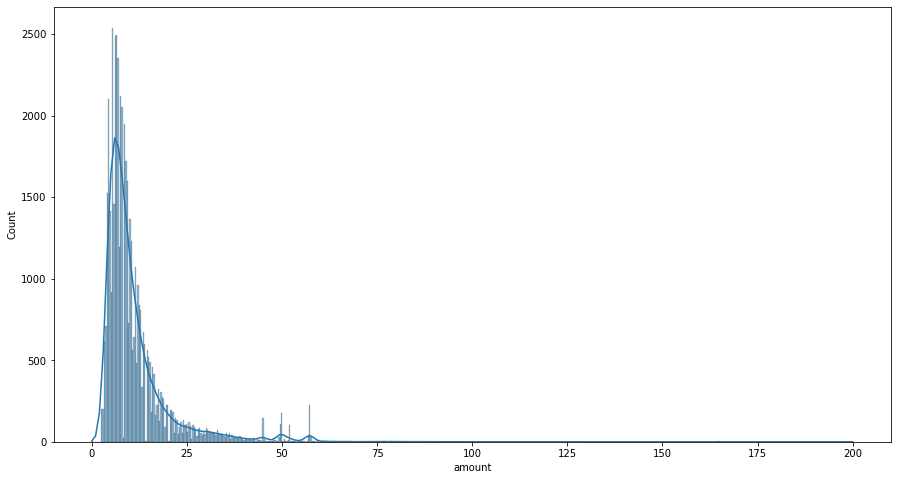

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(df['amount'],kde=True,)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

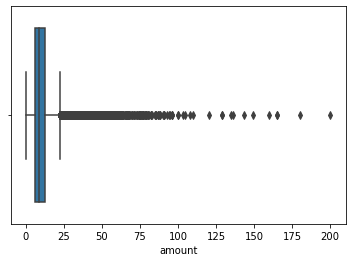

In [24]:
sns.boxplot(df['amount'])

<AxesSubplot:xlabel='year', ylabel='amount'>

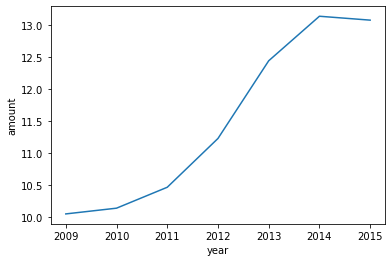

In [25]:
sns.lineplot(x='year',y='amount',data=df,ci=None)

<AxesSubplot:xlabel='year', ylabel='amount'>

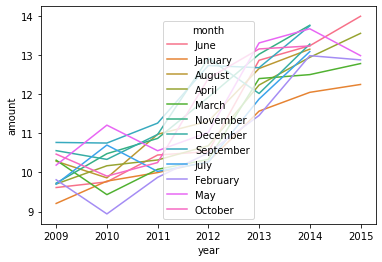

In [26]:
sns.lineplot(x='year',y='amount',data=df,ci=None,hue='month')

<AxesSubplot:xlabel='month', ylabel='amount'>

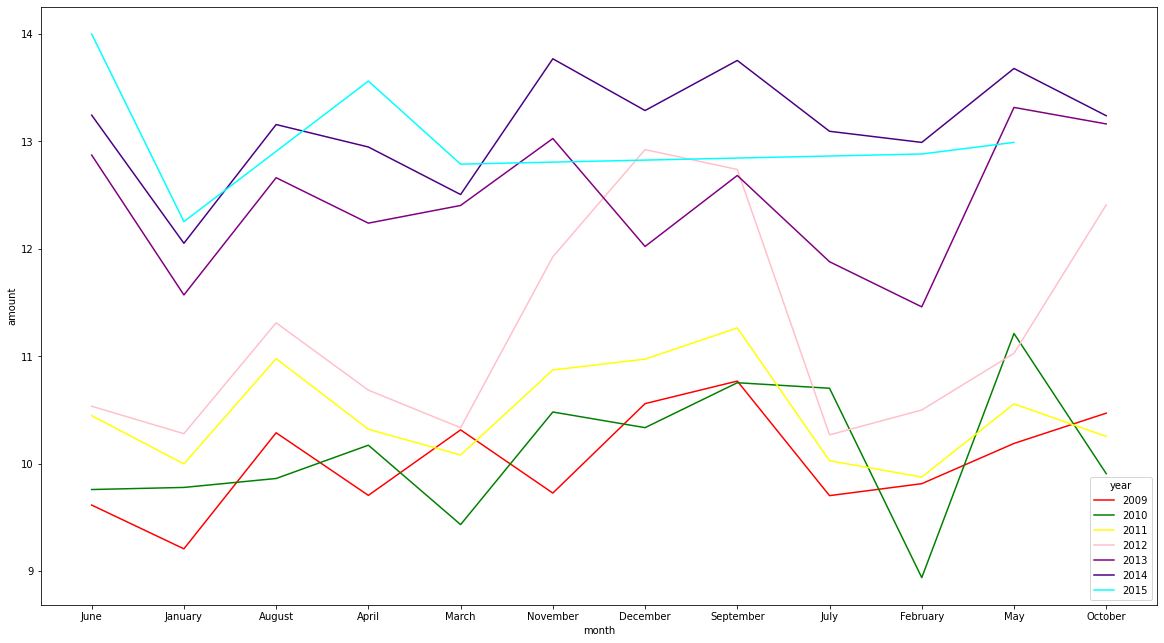

In [27]:
color=['red','green','yellow','pink','purple','indigo','cyan']
plt.figure(figsize=(20,11))
sns.lineplot(x='month',y='amount',data=df,ci=None,hue='year',palette=color)

<AxesSubplot:xlabel='hour', ylabel='amount'>

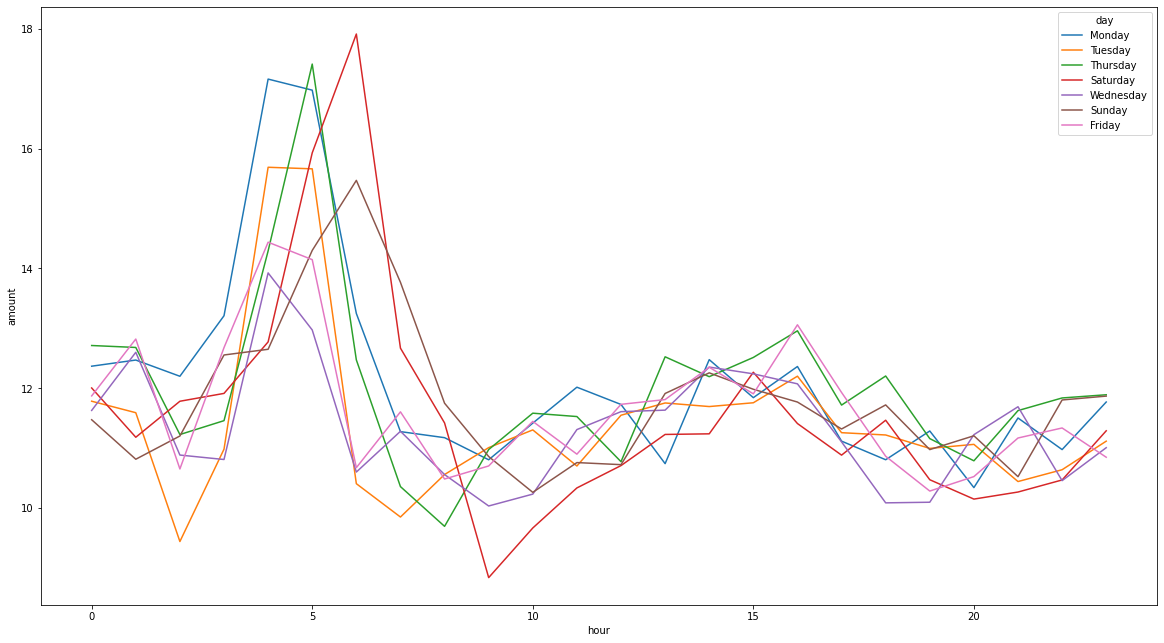

In [28]:
plt.figure(figsize=(20,11))
sns.lineplot(x='hour',y='amount',data=df,ci=None,hue='day')

In [29]:
df.head(1)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1,2009,June,Monday,17


In [39]:
df2=df[df['no_of_passenger']!=0]

In [40]:
df2[df2['no_of_passenger']==0]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour


In [41]:
df2['no_of_passenger'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [48]:
df=df2[df2['longitude_of_dropoff']!=0]

In [52]:
df[df['longitude_of_dropoff']==0]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour


In [53]:
df=df[df['longitude_of_pickup']!=0]

In [56]:
df=df[df['latitude_of_pickup']!=0]

In [62]:
df[df['latitude_of_pickup']==0]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour


In [58]:
df.shape

(48836, 10)

In [63]:
correlation=df.corr()
correlation

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,hour
amount,1.000000,0.016993,-0.012328,0.014369,-0.011953,0.016107,0.120811,-0.021840
longitude_of_pickup,0.016993,1.000000,-0.807748,0.963062,-0.988729,0.008380,0.012326,-0.002664
latitude_of_pickup,-0.012328,-0.807748,1.000000,-0.778100,0.805895,-0.007981,-0.011451,0.001493
longitude_of_dropoff,0.014369,0.963062,-0.778100,1.000000,-0.950728,0.007743,0.012136,-0.003098
latitude_of_dropoff,-0.011953,-0.988729,0.805895,-0.950728,1.000000,-0.008546,-0.012262,0.004398
no_of_passenger,0.016107,0.008380,-0.007981,0.007743,-0.008546,1.000000,0.006598,0.011342
year,0.120811,0.012326,-0.011451,0.012136,-0.012262,0.006598,1.000000,0.004839
hour,-0.021840,-0.002664,0.001493,-0.003098,0.004398,0.011342,0.004839,1.000000


<AxesSubplot:>

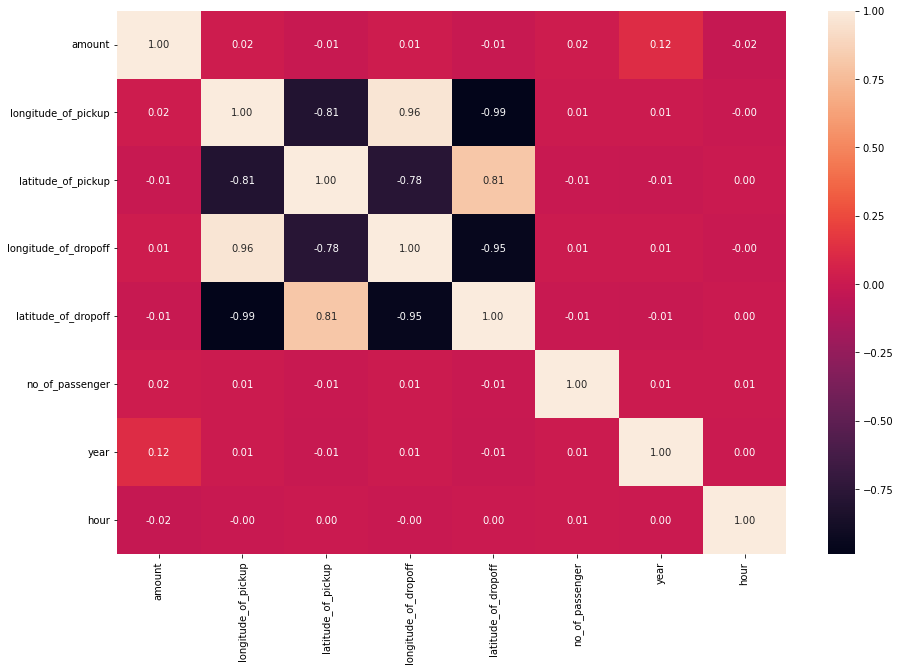

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,fmt='1.2f',)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48836 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48836 non-null  float64
 1   longitude_of_pickup   48836 non-null  float64
 2   latitude_of_pickup    48836 non-null  float64
 3   longitude_of_dropoff  48836 non-null  float64
 4   latitude_of_dropoff   48836 non-null  float64
 5   no_of_passenger       48836 non-null  int64  
 6   year                  48836 non-null  int64  
 7   month                 48836 non-null  object 
 8   day                   48836 non-null  object 
 9   hour                  48836 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 4.1+ MB


In [66]:
df['no_of_passenger'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()

In [69]:
df['day']=le.fit_transform(df['day'])

In [70]:
df['day'].nunique()

7

In [71]:
df['month']=le.fit_transform(df['month'])

In [72]:
df['month'].nunique()

12

In [73]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,1,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,4,5,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,1,4,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,0,2,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,7,5,7


In [74]:
df.drop_duplicates(inplace=True)

## Splitting

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
X = df.drop("amount", axis=1)

y = df.pop("amount")

X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,1,17
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,4,5,16
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,1,4,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,0,2,4
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,7,5,7


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [78]:
Rf_model=RandomForestRegressor()

In [79]:
Rf_model.fit(X_train,train_labels)

RandomForestRegressor()

In [80]:
Rf_model.score(X_train,train_labels)

0.9700512622389966

In [81]:
Rf_model.score(X_test,test_labels)

0.7951742401880058

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
ytrain_predict=Rf_model.predict(X_train)
ytest_predict=Rf_model.predict(X_test)

In [84]:
from sklearn import metrics

In [85]:
metrics.mean_squared_error(train_labels,ytrain_predict,squared=False)

1.6818991883506165

In [86]:
metrics.mean_squared_error(test_labels,ytest_predict,squared=False)

4.31614695133824

## grid_search_cv

In [87]:
from sklearn.model_selection import GridSearchCV

In [188]:
grid={'max_depth':[25],
      'n_estimators':[250],
     'min_samples_split':[60],
     'min_samples_leaf':[18]}

In [189]:
model=RandomForestRegressor(random_state=1)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1)

In [190]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [25], 'min_samples_leaf': [18],
                         'min_samples_split': [60], 'n_estimators': [250]})

In [191]:
grid_search.best_params_

{'max_depth': 25,
 'min_samples_leaf': 18,
 'min_samples_split': 60,
 'n_estimators': 250}

In [192]:
best_model=grid_search.best_estimator_

In [193]:
best_model.score(X_train,train_labels)

0.7898920086190033

In [194]:
best_model.score(X_test,test_labels)

0.7738503239196438

In [195]:
ytrain_predict=best_model.predict(X_train)
ytest_predict=best_model.predict(X_test)

In [196]:
metrics.mean_squared_error(train_labels,ytrain_predict,squared=False)

4.45483871167339

In [197]:
metrics.mean_squared_error(test_labels,ytest_predict,squared=False)

4.535257188480989

# Linear Regression

In [ ]:
x

In [ ]:
df.info()

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(4,1,1)
sns.boxplot(df.longitude_of_pickup,orient='h',color="olive")
plt.subplot(4,1,2)
sns.boxplot(df.latitude_of_pickup,orient='h',color="red")
plt.subplot(4,1,3)
sns.boxplot(df.longitude_of_dropoff,orient='h',color="purple")
plt.subplot(4,1,4)
sns.boxplot(df.latitude_of_dropoff,orient='h',color="purple")

In [ ]:
sns.boxplot(df['no_of_passenger'])

In [ ]:
def remove_outlier(col):
    sorted (col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
lrlop,urlop=remove_outlier(df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']>urlop,urlop,df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']<lrlop,lrlop,df['longitude_of_pickup'])

In [ ]:
sns.boxplot(df['longitude_of_pickup'])

In [ ]:
lrlap,urlap=remove_outlier(df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']>urlap,lrlap,df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']<lrlap,lrlap,df['latitude_of_pickup'])

In [ ]:
sns.boxplot(df['latitude_of_pickup'])